In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline

# 빅데이터 개론 정리(중간 이후)
> 11월 1일 ~

- toc: true 
- badges: true
- comments: true
- author : 김혜지
- categories: [python]

# 함수


## np

In [3]:
np.sqrt(2)

1.4142135623730951

In [5]:
np.log(10)

2.302585092994046

In [7]:
np.sin(3)

0.1411200080598672

In [8]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
np.arange(10,20,0.5)

array([10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ,
       15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5])

In [11]:
a = np.arange(10)

In [12]:
max(a), np.max(a)

(9, 9)

In [13]:
sum(a), np.sum(a)

(45, 45)

In [14]:
np.mean(a)

4.5

In [16]:
np.cumsum(a) # x 의 원소들의 누적합(cumulative sum)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

## 함수 만들기

### 숫자 벡터 또는 리스트에 있는 양수들의 합

In [19]:
my_numbers = np.arange(-10,10)

my_sum = 0
for value in my_numbers :
    if value > 0 :
        my_sum = my_sum + value

my_sum

45

### 함수 예제 -마이너스를 플러스로 바꾸는 함수(절대값)

In [20]:
def minus2plus(x) :
    if x < 0:
        res = -x
    else :
        res = x
    return res

In [21]:
minus2plus(-2) 

2

In [22]:
minus2plus(4.0)

4.0

In [23]:
minus2plus(0.0)

0.0

## 여러 개의 값을 가진 리스트나 벡터를 인자로 하는 함수 만들기
### 양수들만의 합을 구하는 함수 sum_positive

In [24]:
def sum_positive(x) :
    sum_plus = 0
    for value in x :
        if value > 0 :
            sum_plus = sum_plus + value
    return sum_plus
#양수들의 합을 구해주는 함수

In [25]:
# my_numbers = np.arange(-10,10)

# my_sum = 0
# for value in my_numbers :
#     if value > 0 :
#         my_sum = my_sum + value

# my_sum

In [26]:
sum_positive(my_numbers)

45

In [27]:
your_numbers = np.arange(100)

In [28]:
your_sum = sum_positive(your_numbers) # 함수의 결과를 새로운 변수에 저장
your_sum

4950

### 문자열이 포함된 원소가 몇 개가 있는지 세어주는 함수 count_char

In [29]:
def count_char(x, c) :
  count = 0
  for value in x :
    if c in value :
      count = count + 1
  return count

In [30]:
# 용희인 학생이 몇 명인지 알아보자.
student_names = ['김철수', '이용희', '손흥민', '방탄소년', '김용희', '박서준', '김지원']
count_char(student_names, "용희")

2

In [31]:
#  4개의 윷이 던져진 결과에서 등 의 개수를 세어주는 작업
yoot_draw = ['등', '등', '배', '등']
count_char(yoot_draw, "등")

3

## 메소드

In [32]:
x = [1,2,3,4]
x.append(5)
x

[1, 2, 3, 4, 5]

In [33]:
x.append(100)
x

[1, 2, 3, 4, 5, 100]

In [34]:
df = pd.DataFrame({'x': [-10,2,5,-4], 'y': [1, 2, -3, 2]})
df

,x,y
0,-10,1
1,2,2
2,5,-3
3,-4,2


In [35]:
df.sum()

x   -7
y    2
dtype: int64

In [36]:
# df의 x열의 함수 
sum(df.x)

-7

### 행의 합 구하기

In [37]:
df.sum(axis=1)

0   -9
1    4
2    2
3   -2
dtype: int64

## 데이터 프레임에 함수 적용하기

dataframe.applymap(function)

In [38]:
df.applymap(minus2plus)

,x,y
0,10,1
1,2,2
2,5,3
3,4,2


In [39]:
df.apply(sum_positive, axis=0) # axis = 0 은 함수를 각 열에 대하여 적용

x    7
y    5
dtype: int64

In [40]:
df.apply(sum_positive, axis=1) # axis = 1 : 각 행에 대하여 적용

0    1
1    4
2    5
3    2
dtype: int64

## 2개 이상의 인자를 함수에 적용하기

In [43]:
# def function(x,y,z):
#   ....
#   ....
#   return ...

# dataframe.apply(function, x=2, z="a", axis=1)

In [42]:
df2 = pd.DataFrame({ 'name': student_names})
df2

,name
0,김철수
1,이용희
2,손흥민
3,방탄소년
4,김용희
5,박서준
6,김지원


In [44]:
df2.apply(count_char, c="용희", axis=0) #원하는 문자열을 세어주는 함수에다가 용희를 검색하게 함, 열 단위로

name    2
dtype: int64

In [47]:
df2.apply(count_char, c="김", axis=0) #김씨인 사람

name    3
dtype: int64

### 함수의 데이터 취급

In [51]:
another_function = minus2plus
# 다른 이름을 가진 함수로 정의하기 

In [50]:
another_function(-20) #똑같이 적용됨을 알 수 있음 

20

보너스를 주는 규칙을 함수로 만들었다고 하자. 연봉이 3000만원 이하면 연봉의 20%, 3000만원 초과면 15%를 보너스로 준다.

In [52]:
def bonus_amount(salary):
  if salary <= 3000 :
    bonus = salary * 0.2
  else : 
    bonus = salary * 0.15

  return bonus

In [53]:
bonus_amount(2000)

400.0

In [54]:
bonus_amount(4000)

600.0

직원 1명을 고용해서 드는 총비용이 연봉(salary), 보험료(insurance), 야근 수당(night), 보너스를 합친 액수라고 하자. 이러한 총비용을 계산하는 함수 total_expense 를 다음과 같이 정의하자. 함수 total_expense 의 마지막 인자는 보너스를 계산하는 함수 이름이다.

In [55]:
def total_expense(salary, insurance, night, bonus_function) :
  expense  = salary + insurance + night + bonus_function(salary)
  return expense

In [57]:
total_expense(4000, 200, 100, bonus_amount) #bonus_amount는 함수임에도 불구하고 인자처럼 쓰일 수 있음

4900.0

모든 직원에게 1000만원 특별 보너스를 지급하려고 한다. 새로운 함수 bonus_amount_special 를 만들고 총비융을 계산하는 함수에 인자로 보내주면 된다.

In [60]:
def bonus_amount_special(salary):
  if salary <= 3000 :
    bonus = salary * 0.2
  else : 
    bonus = salary * 0.15
  
  bonus = bonus + 1000

  return bonus

In [61]:
total_expense(4000, 200, 100, bonus_amount_special)

5900.0

# 함수 문제 - 주사위 게임 함수화 

나와 규빈에게 각가 200000원이 있다. 주사위를 던져 2 이하의 눈이 나오면 내가 승리하고 10000원을 규빈으로부터 받는다. 반면 3 이상이 나오면 규빈이 승리하고 규빈에게 8000원을 주어야 한다.

In [68]:
gu = 200000
me = 200000

for i in np.arange(20):
    x = np.random.rand(1)
    if x < 1/3:
        me += 10000
        gu -= 10000
    else :
        me -= 6000
        gu += 6000
    print([me, gu])


[194000, 206000]
[204000, 196000]
[214000, 186000]
[208000, 192000]
[202000, 198000]
[212000, 188000]
[206000, 194000]
[216000, 184000]
[226000, 174000]
[220000, 180000]
[214000, 186000]
[208000, 192000]
[218000, 182000]
[212000, 188000]
[222000, 178000]
[216000, 184000]
[226000, 174000]
[220000, 180000]
[214000, 186000]
[224000, 176000]


In [86]:
def game_m(me_i, gu_i, me_r, gu_r, rep, prob):
    me = me_i
    gu = gu_i
    for i in np.arange(rep):
        x = np.random.rand(1)
        if  x < prob :
            me += me_r
            gu -= me_r
        else :
            me -= gu_r
            gu += gu_r
        print([me, gu])
    final = [me, gu]
    #print(final)
    plt.bar(np.arange(2),final) #두개
    return final

[194000, 206000]
[195000, 205000]
[196000, 204000]
[197000, 203000]
[198000, 202000]
[199000, 201000]
[200000, 200000]
[194000, 206000]
[195000, 205000]
[196000, 204000]
[190000, 210000]
[184000, 216000]
[178000, 222000]
[179000, 221000]
[180000, 220000]
[174000, 226000]
[175000, 225000]
[169000, 231000]
[163000, 237000]
[164000, 236000]


[164000, 236000]

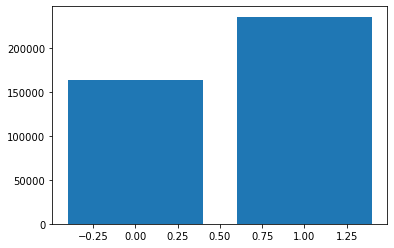

In [87]:
game_m(200000, 200000, 1000, 6000, 20, 1/3)

# 표본

**표본(sample)은 분석의 대상이 되는 전체집단, 즉 모집단(population)의 일부분이다.**

철수가 선거구의 가장 번화한 거리에 나가서 지나가는 사람들 1000명을 면담하고 후보의 지지율이 55% 라는 정보를 얻었다고 하자. 조사한 55%의 지지율이 실제 전체 유권자의 지지율과 얼마나 차이가 나는지 알 수 없다면 이러한 정보 수집은 의미가 있는가? 

가장 번화한 거리를 지나가는 사람들은 매우 다양하기 때문에 전체 유권자를 잘 대표할 수 있고 또한 1000명은 상당한 큰 수이므로 자신의 표본은 쓸만하다고 철수가 주장한다면 여러분은 여기에 동의하는가? 

이제 영이가 철수의 방법보다 더 나은 방법이 있다고 주장한다. 영이가 제안한 1000명의 표본을 추출하는 방법은 다음과 같다.

임의로 추출되었다(randomly selected)는 의미를 쉽게 표현하면 전화번호가 수록된 명부에서 유권자 1000명을 눈감고 뽑았다는 의미이다. 물론 같은 사람을 두 번 이상 뽑지는 않는다.

눈감고 뽑았다는 의미는 **모든 유권자가 표본에 포함될 가능성이 같다** 는 것이다. 이렇게 “눈 감고 표본을 추출” 하는 방법을 **단순임의추출**(simple random sampling) 이라고 하며 추출된 표본을 **확률표본**(random sample, probability sample) 이라고 부른다.

철수의 방법으로 얻은 표본을 비확률표본 또는 편의표본((convenience sample)이라고 부른다. 데이터과학에서 다루는 표본은 거의 대부분 확률표본이다.

 - 확률표본: 모집단의 속한 모든 개체가 표본에 속할 가능성이 같은 경우(철수)

 - 편의표본: 개체가 표본에 포함되는 가능성을 알 수 없는 표본(영이)

In [112]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_201909_3.csv"
bike = pd.read_csv(url1, encoding="CP949")

In [93]:
bike.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-17003,2019-09-28 16:10:55,368,SK 서린빌딩 앞,4,2019-09-28 17:03:32,2002,노들역 1번출구,14,52,8940.0
1,SPB-14405,2019-09-28 16:48:16,2024,상도역 1번출구,3,2019-09-28 17:03:44,2002,노들역 1번출구,18,15,1910.0
2,SPB-18431,2019-09-28 16:59:54,2002,노들역 1번출구,10,2019-09-28 17:03:57,2002,노들역 1번출구,10,2,30.0
3,SPB-04853,2019-09-28 15:31:49,207,여의나루역 1번출구 앞,32,2019-09-28 17:10:12,2002,노들역 1번출구,19,98,9610.0
4,SPB-11122,2019-09-28 15:35:41,207,여의나루역 1번출구 앞,14,2019-09-28 17:10:37,2002,노들역 1번출구,18,90,9450.0
5,SPB-23089,2019-09-28 17:02:37,2003,사육신공원앞,5,2019-09-28 17:13:44,2002,노들역 1번출구,10,10,1410.0
6,SPB-15669,2019-09-28 16:17:54,2213,고속터미널역 5번출구 앞,7,2019-09-28 17:14:22,2002,노들역 1번출구,8,56,0.0
7,SPB-09727,2019-09-28 17:04:56,2002,노들역 1번출구,5,2019-09-28 17:17:10,2002,노들역 1번출구,17,11,380.0
8,SPB-10053,2019-09-28 16:59:45,2002,노들역 1번출구,3,2019-09-28 17:17:53,2002,노들역 1번출구,5,17,1080.0
9,SPB-14487,2019-09-28 16:01:41,2024,상도역 1번출구,5,2019-09-28 17:20:44,2002,노들역 1번출구,14,78,13870.0


In [95]:
bike.shape

(407589, 11)

In [101]:
bike.T

,0,1,2,3,4,5,6,7,8,9,...,407579,407580,407581,407582,407583,407584,407585,407586,407587,407588
자전거번호,SPB-17003,SPB-14405,SPB-18431,SPB-04853,SPB-11122,SPB-23089,SPB-15669,SPB-09727,SPB-10053,SPB-14487,...,SPB-04848,SPB-03378,SPB-12697,SPB-16477,SPB-18051,SPB-24072,SPB-16130,SPB-03728,SPB-08928,SPB-06988
대여일시,2019-09-28 16:10:55,2019-09-28 16:48:16,2019-09-28 16:59:54,2019-09-28 15:31:49,2019-09-28 15:35:41,2019-09-28 17:02:37,2019-09-28 16:17:54,2019-09-28 17:04:56,2019-09-28 16:59:45,2019-09-28 16:01:41,...,2019-09-03 08:54:59,2019-09-03 09:37:57,2019-09-05 08:53:09,2019-09-09 08:53:39,2019-09-10 08:58:57,2019-09-12 08:56:34,2019-09-18 10:13:09,2019-09-25 08:00:28,2019-09-30 07:49:27,2019-09-30 09:58:43
대여 대여소번호,368,2024,2002,207,207,2003,2213,2002,2002,2024,...,230,99999,240,240,240,240,99999,2183,2183,99999
대여 대여소명,SK 서린빌딩 앞,상도역 1번출구,노들역 1번출구,여의나루역 1번출구 앞,여의나루역 1번출구 앞,사육신공원앞,고속터미널역 5번출구 앞,노들역 1번출구,노들역 1번출구,상도역 1번출구,...,영등포구청역 1번출구,영남단말기정비,문래역 4번출구 앞,문래역 4번출구 앞,문래역 4번출구 앞,문래역 4번출구 앞,영남단말기정비,동방1교,동방1교,영남단말기정비
대여거치대,4,3,10,32,14,5,7,5,3,5,...,10,1,5,1,5,9,1,7,10,5
반납일시,2019-09-28 17:03:32,2019-09-28 17:03:44,2019-09-28 17:03:57,2019-09-28 17:10:12,2019-09-28 17:10:37,2019-09-28 17:13:44,2019-09-28 17:14:22,2019-09-28 17:17:10,2019-09-28 17:17:53,2019-09-28 17:20:44,...,2019-09-03 09:03:55,2019-09-03 10:35:28,2019-09-05 08:59:21,2019-09-09 09:27:21,2019-09-10 09:10:40,2019-09-12 09:03:37,2019-09-18 11:38:30,2019-09-25 08:54:02,2019-09-30 09:42:27,2019-09-30 13:01:26
반납대여소번호,2002,2002,2002,2002,2002,2002,2002,2002,2002,2002,...,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999
반납대여소명,노들역 1번출구,노들역 1번출구,노들역 1번출구,노들역 1번출구,노들역 1번출구,노들역 1번출구,노들역 1번출구,노들역 1번출구,노들역 1번출구,노들역 1번출구,...,영남단말기정비,영남단말기정비,영남단말기정비,영남단말기정비,영남단말기정비,영남단말기정비,영남단말기정비,영남단말기정비,영남단말기정비,영남단말기정비
반납거치대,14,18,10,19,18,10,8,17,5,14,...,2,1,2,2,2,2,1,5,7,5
이용시간,52,15,2,98,90,10,56,11,17,78,...,8,57,5,33,11,6,85,53,2,182


In [103]:
bike.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리'],
      dtype='object')

In [109]:
#이용거리의 분포를 히스토그램과 상자그림으로 그려보자. 오른쪽으로 매우 치우친 분포인것을 알 수 있다.

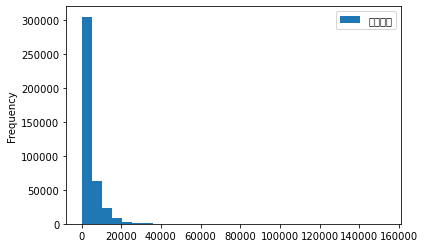

In [114]:
bike.plot.hist(y="이용거리", bins= 30);

/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


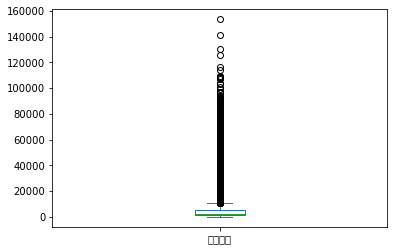

In [117]:
bike.plot.box(y="이용거리");

In [128]:
bike[["이용거리"]].describe()


,이용거리
count,407589.000000
mean,4253.336228
std,5782.673901
min,0.000000
25%,1200.000000
50%,2380.000000
75%,5130.000000
max,153490.000000


## 샘플 추출
데이터프레임에서 행, 즉 레코드를 단순임의추출 방법으로 추출하는 메소드는 sample()이다.

DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)
- n: 표본의 크기

- frac: 표본의 비율

- replace : 복원추출에 대한 여부

- random_state : 표본추출시 사용되는 난수를 지정. 지정한 난수가 같으면 동일한 표본이 추출된다.

In [121]:
bike_sample_100 = bike.sample(n=100, replace=False, random_state=1)
bike_sample_100.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
375631,SPB-11285,2019-09-21 10:06:07,1452,겸재교 진입부,9,2019-09-21 10:38:10,3520,광진경찰서,4,30,5920.0
219156,SPB-10989,2019-09-24 22:36:38,2321,학여울역 사거리,9,2019-09-24 22:41:46,2320,도곡역 대치지구대 방향,1,4,0.0
2646,SPB-20213,2019-09-11 15:51:03,1986,태평양물산빌딩,8,2019-09-11 16:28:15,2007,유한양행앞,6,37,5450.0
329716,SPB-05859,2019-09-11 09:09:47,1912,한신휴아파트 앞,9,2019-09-11 09:15:23,2801,대륭포스트타워1차,14,5,830.0
35470,SPB-03699,2019-09-01 14:19:17,2265,이수고가차도 남단,2,2019-09-01 14:34:28,2060,남성역3번출구 뒤,6,14,2160.0
132032,SPB-03922,2019-09-20 22:09:34,274,영등포역지하쇼핑센타 5번출구,1,2019-09-20 23:14:57,2219,"고속터미널역 8-1번, 8-2번 출구 사이",9,65,11820.0
15067,SPB-17943,2019-09-17 18:24:58,2002,노들역 1번출구,18,2019-09-17 19:57:08,2025,흑석역 1번출구,3,91,8560.0
226253,SPB-07462,2019-09-03 18:27:38,2358,구룡초사거리 (현대아파트10동 앞 ),4,2019-09-03 18:41:48,2329,르네상스호텔사거리 역삼지하보도 2번출구,6,13,2520.0
318420,SPB-13058,2019-09-10 15:52:12,2620,송파나루역 4번 출구옆,7,2019-09-10 16:05:27,2622,올림픽공원역 3번출구,8,13,2220.0
405911,SPB-18550,2019-09-09 19:10:55,549,아차산역 3번출구,5,2019-09-09 19:19:11,3542,래미안 구의파크 스위트,17,7,1090.0


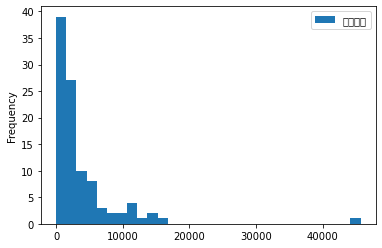

In [123]:
bike_sample_100.plot.hist(y="이용거리", bins= 30);

/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


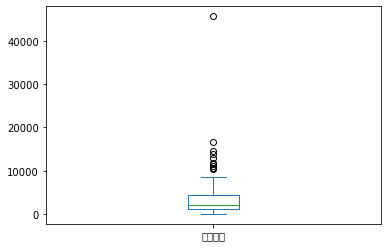

In [124]:
bike_sample_100.plot.box(y="이용거리");

In [127]:
bike_sample_100[["이용거리"]].describe()

,이용거리
count,100.000000
mean,3824.100000
std,5524.629901
min,0.000000
25%,1157.500000
50%,2170.000000
75%,4285.000000
max,45700.000000


추출된 표본에 속한 데이터의 분포는 경험적 분포(empirical distribution)라고 부른다. 경험적이라는 의미는 추출된 관측값들의 분포 라는 것이다. 대부분 경우 모집단 전체를 관측할 수 없기 때문에 모집단에 대해서는 경험적 분포라고 부르지 않고 모집단 분포(population distribution)라고 따로 부른다.

확률표본의 경험적 분포는 표본의 수가 증가하면 모집단의 분포와 점점 유사하게 나타날 것이라고 예상할 수 있다. 즉, **표본의 개수(sample size)가 증가하면 확률표본에서 얻은 정보는 모집단에 대한 정보와 점점 가까워 진다.**

위에서 영이의 표본은 확률표본이므로 추출된 유권자의 수가 증가하면 표본으로 부터 얻은 지지율이 모집단의 지지율에 가까워진다. **표본의 크기가 커지면 확률표본의 경험적 분포가 모집단의 분포에 점점 가까워 지는 법칙을 대수의 법칙 (law of large number)라고 한다.**

In [129]:
# 아래 코드에서 선택문 random_state= 의 숫자를 바꾸면 다른 10,000 개의 표본이 추출된다. 여러분이 선택문 random_state= 의 숫자를 다른 숫자로 바꾸면서 표본에서 얻어진 이용거리의 평균이 어떻게 변하는지 알아 보자.

In [141]:
bike_sample_10000 = bike.sample(n=10000, replace=False, random_state=3)

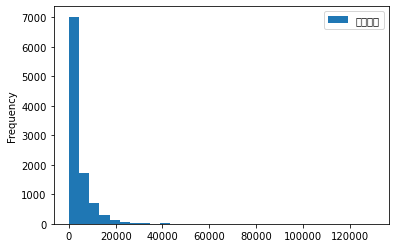

In [142]:
bike_sample_10000.plot.hist(y="이용거리", bins= 30);

/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


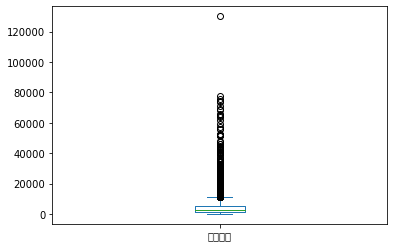

In [144]:
bike_sample_10000.plot.box(y="이용거리");

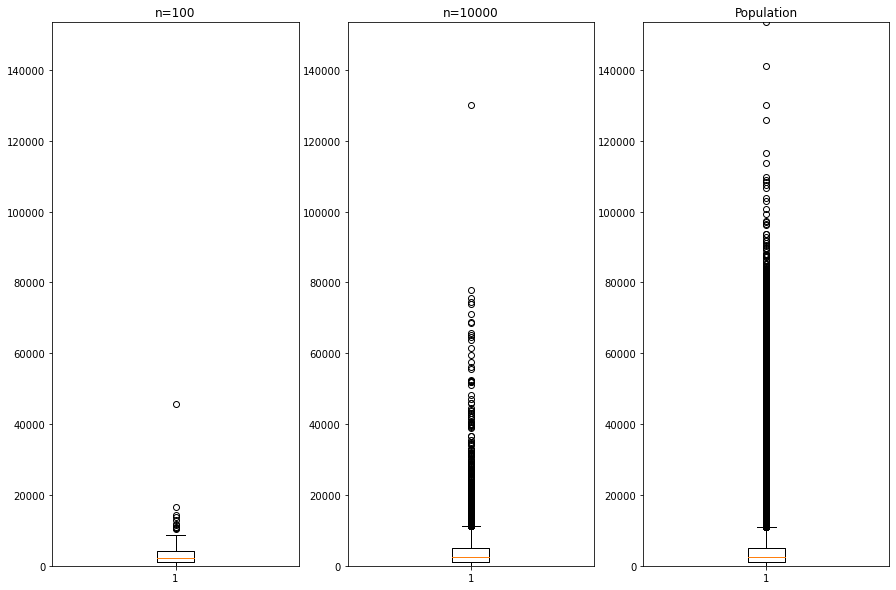

In [145]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,10))

axes[0].boxplot(bike_sample_100.이용거리)
axes[0].set_ylim(0,153500)
axes[0].set_title('n=100')

axes[1].boxplot(bike_sample_10000.이용거리)
axes[1].set_ylim(0,153500)
axes[1].set_title('n=10000')

axes[2].boxplot(bike.이용거리)
axes[2].set_ylim(0,153500)
axes[2].set_title('Population')

plt.show()

- 표본의 크기가 작을 때는 표본 평균이 모집단의 평균에서 멀어진 경우가 많이 나타나지만 표본의 크기가 증가하면서 모집단의 평균에 점점 가까워지는 경향을 보인다.

In [146]:
n = np.arange(10,2021,20)
n

array([  10,   30,   50,   70,   90,  110,  130,  150,  170,  190,  210,
        230,  250,  270,  290,  310,  330,  350,  370,  390,  410,  430,
        450,  470,  490,  510,  530,  550,  570,  590,  610,  630,  650,
        670,  690,  710,  730,  750,  770,  790,  810,  830,  850,  870,
        890,  910,  930,  950,  970,  990, 1010, 1030, 1050, 1070, 1090,
       1110, 1130, 1150, 1170, 1190, 1210, 1230, 1250, 1270, 1290, 1310,
       1330, 1350, 1370, 1390, 1410, 1430, 1450, 1470, 1490, 1510, 1530,
       1550, 1570, 1590, 1610, 1630, 1650, 1670, 1690, 1710, 1730, 1750,
       1770, 1790, 1810, 1830, 1850, 1870, 1890, 1910, 1930, 1950, 1970,
       1990, 2010])

In [149]:
len(n)

101